In [1]:
import numpy as np
import lightkurve as lk

Using the Python package "[Lightkurve](https://docs.lightkurve.org/)" it is possible to analyze the brightness of stars using data of NASA's Kepler & TESS space telescopes. There is no Exoplanet listed for the sun TIC-239332587 but the periodiacal dips in the brightness of the sun indicate that there might be a planet orbiting the sun.

In [2]:
pixelfile = lk.search_targetpixelfile('TIC 239332587', mission="TESS").download()
pixelfile.animate()
pixelfile.interact()
aperture_mask = pixelfile.create_threshold_mask(threshold=10)

# The Star 'TIC 239332587'
* RA (ra): 311.267079900858 (20:45:04.099)
* Dec (dec): 44.4990676080927 (+44:29:56.64)
* Stellar Radius (rad): 0.425169
* Stellar Radius Err. (e_rad): 0.0125082
* Stellar Mass (mass): 0.419577 
* Stellar Mass Err. (e_mass): 0.0201656
* Stellar Density (rho): 5.45917
* Stellar Density Err. (e_rho): 0.219466
* Luminosity Class from RPM (lumclass):DWARF
* Stellar Luminosity (lum): 0.026543
* Stellar Luminosity Err. (e_lum): 0.006258175
* T_eff (Teff): 3573
* T_eff Err. (e_Teff): 157
* Distance (d): 12.0445
* Distance Err. (e_d): 0.00435
* TeffFlag (TeffFlag):cdwrf

In [3]:
lightCurveOne = pixelfile.to_lightcurve(aperture_mask = pixelfile.pipeline_mask)
lightCurveTwo = pixelfile.to_lightcurve(aperture_mask = aperture_mask)
lightCurveOne = lightCurveOne.flatten(window_length = 401).remove_outliers(sigma=6)
lightCurveTwo = lightCurveOne.flatten(window_length = 401)

In [4]:
mask = (((lightCurveTwo.time.value < 1714)|(lightCurveTwo.time.value > 1716))&((lightCurveTwo.time.value < 1719)|(lightCurveTwo.time.value > 1721.8))&((lightCurveTwo.time.value < 1723.4)|(lightCurveTwo.time.value > 1726.5))& (lightCurveTwo.time.value < 1734)) 
lightCurveTwo = lightCurveTwo[mask]
lightCurveTwo = lightCurveTwo.remove_outliers(sigma=6)

In [5]:
lc = lk.search_lightcurve('TIC 239332587', mission="TESS")
lc

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 15,2019,TESS-SPOC,1800,239332587,0.0
1,TESS Sector 15,2019,QLP,1800,239332587,0.0


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

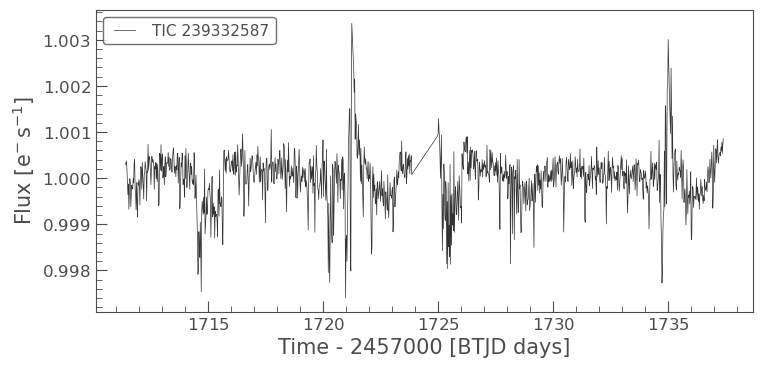

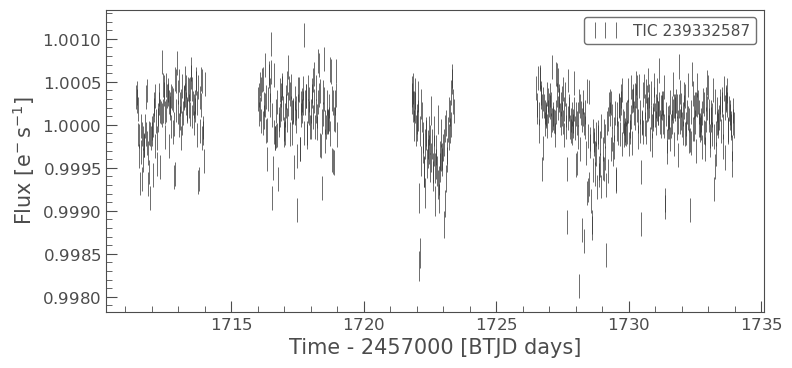

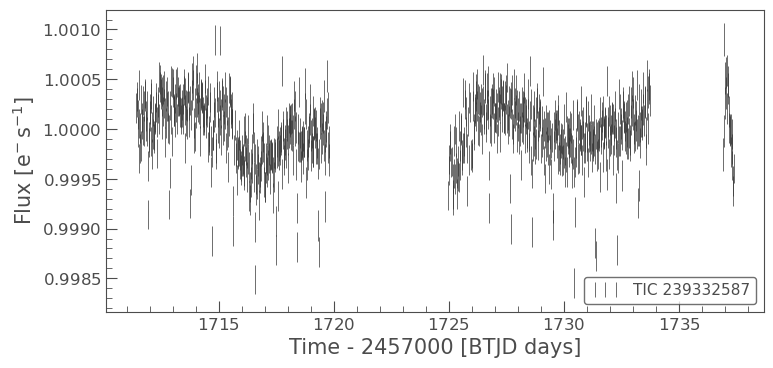

In [6]:
lightCurveThree = lk.search_lightcurve('TIC 239332587', mission="TESS")[0].download()
lightCurveThree = lightCurveThree.flatten(window_length = 401)
lightCurveOne.plot()
lightCurveTwo.errorbar()
lightCurveThree.errorbar()

<AxesSubplot:title={'center':'TIC 239332587'}, xlabel='Phase', ylabel='Cycle'>

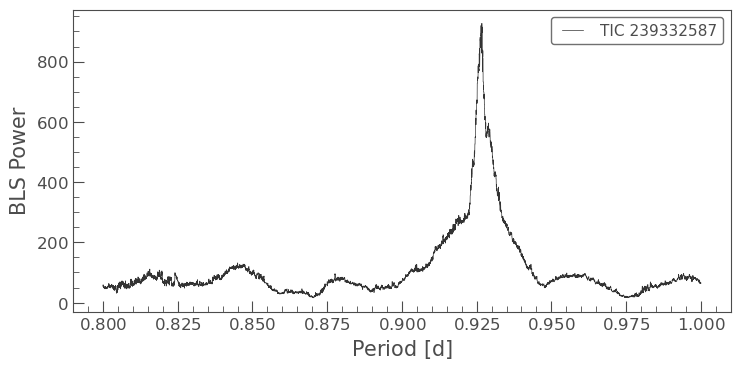

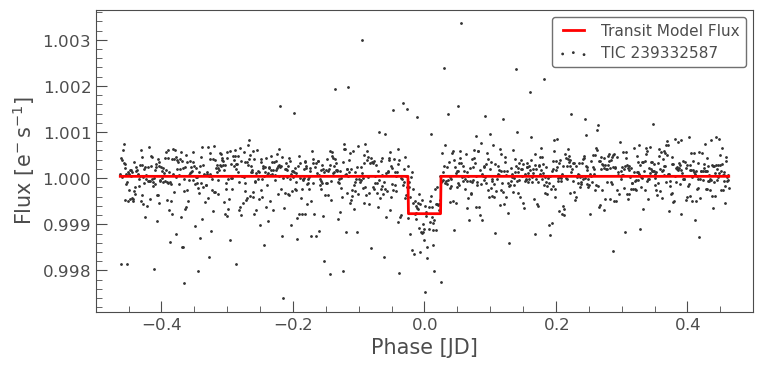

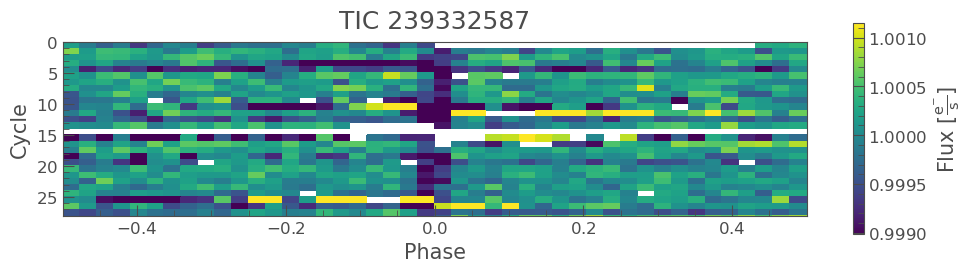

In [7]:
period = np.linspace(0.8, 1, 100000)
periodogramOne = lightCurveOne.to_periodogram(method='bls', period=period, frequency_factor=500);
periodogramOne.plot();
OnePeriod = periodogramOne.period_at_max_power
Onet0 = periodogramOne.transit_time_at_max_power
OneDur = periodogramOne.duration_at_max_power

lc = lightCurveOne.fold(period=OnePeriod, epoch_time=Onet0)
ax = lc.scatter()
ax.set_xlim(-0.5, 0.5)
modelOne = periodogramOne.get_transit_model(period=OnePeriod,
                                       transit_time=Onet0,
                                       duration=OneDur)
modelOne.fold(OnePeriod, Onet0).plot(ax=ax, c='r', lw=2)
ax.set_xlim(-0.5, 0.5)
lc.plot_river()

<AxesSubplot:title={'center':'TIC 239332587'}, xlabel='Phase', ylabel='Cycle'>

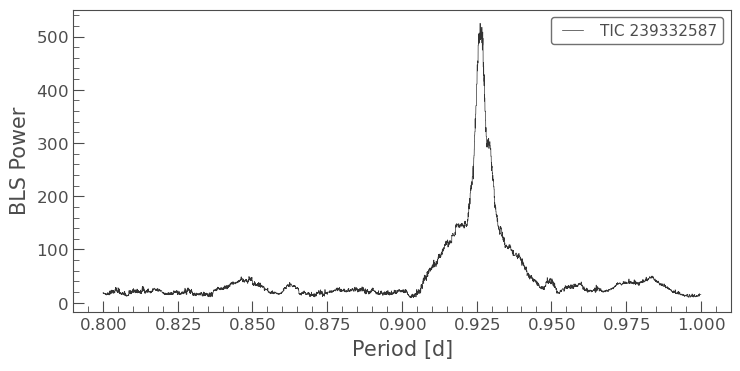

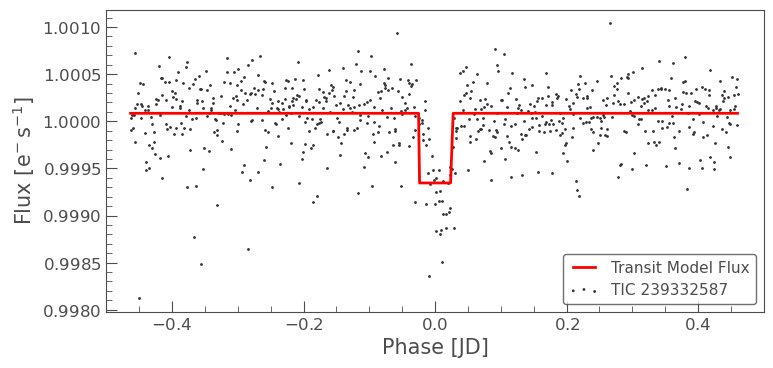

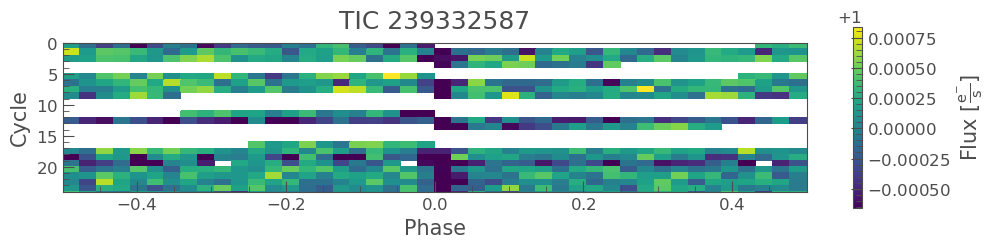

In [8]:
period = np.linspace(0.8, 1, 100000)
periodogramTwo = lightCurveTwo.to_periodogram(method='bls', period=period, frequency_factor=500);
periodogramTwo.plot();
TwoPeriod = periodogramTwo.period_at_max_power
Twot0 = periodogramTwo.transit_time_at_max_power
TwoDur = periodogramTwo.duration_at_max_power

lc = lightCurveTwo.fold(period=TwoPeriod, epoch_time=Onet0)
ax = lc.scatter()
ax.set_xlim(-0.5, 0.5)
modelTwo = periodogramTwo.get_transit_model(period=TwoPeriod,
                                       transit_time=Twot0,
                                       duration=TwoDur)
modelTwo.fold(TwoPeriod, Twot0).plot(ax=ax, c='r', lw=2)
ax.set_xlim(-0.5, 0.5)
lc.plot_river()

<AxesSubplot:title={'center':'TIC 239332587'}, xlabel='Phase', ylabel='Cycle'>

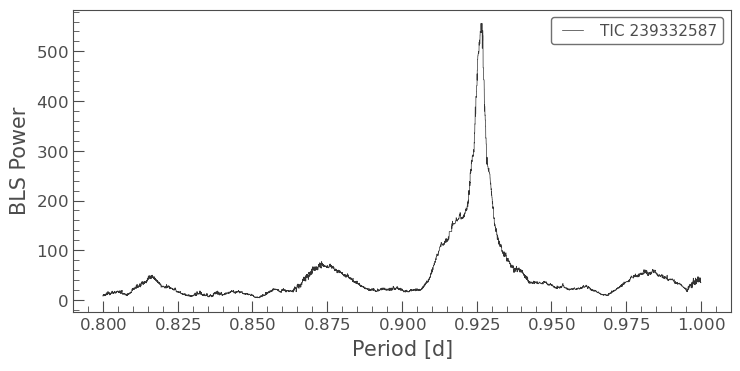

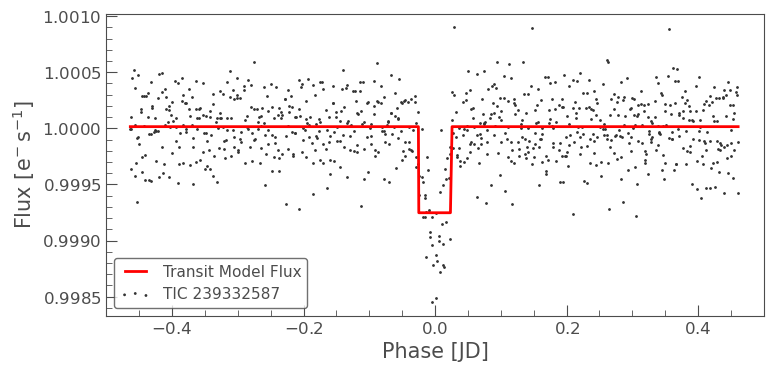

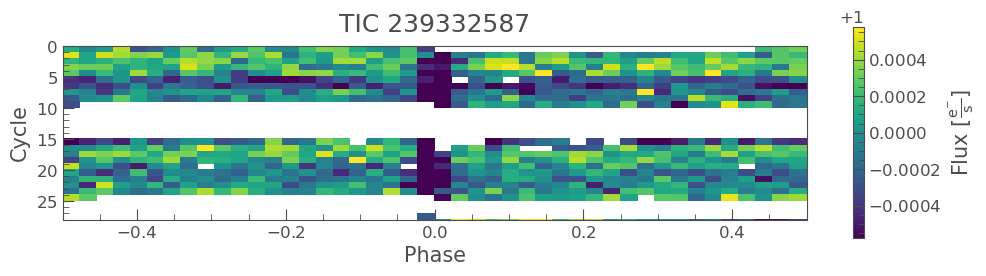

In [9]:
period = np.linspace(0.8, 1, 100000)
periodogramThree = lightCurveThree.to_periodogram(method='bls', period=period, frequency_factor=500);
periodogramThree.plot();
ThreePeriod = periodogramThree.period_at_max_power
Threet0 = periodogramThree.transit_time_at_max_power
ThreeDur = periodogramThree.duration_at_max_power

lc = lightCurveThree.fold(period=ThreePeriod, epoch_time=Threet0)
ax = lc.scatter()
ax.set_xlim(-0.5, 0.5)
modelTwo = periodogramThree.get_transit_model(period=ThreePeriod,
                                       transit_time=Threet0,
                                       duration=ThreeDur)
modelTwo.fold(ThreePeriod, Threet0).plot(ax=ax, c='r', lw=2)
ax.set_xlim(-0.5, 0.5)
lc.plot_river()

In [10]:
print(periodogramOne.period_at_max_power)
print(periodogramTwo.period_at_max_power)
print(periodogramThree.period_at_max_power)

0.9267232672326724 d
0.92609926099261 d
0.9267772677726778 d


It is an ultra-short period planet with an orbital period of about 22.24 hours (= 80066.88 seconds). The transits decrease the flux from 1.0 to about 0.9993 - a decrease of about 0.07%. <br>

## Approximate calculations

### Orbital Radius
$P^2 = [\frac{4\pi^2}{G(M+m)}]*a^3$ <br><br>
$a = \sqrt[3]{\frac{P^2}{\frac{4\pi^2}{G(M + m)}}}$<br><br>
The planetary mass can be neglected. <br><br>
$a = \sqrt[3]{\frac{P^2}{\frac{4\pi^2}{G*M}}}$<br><br>

In [11]:
import math
P = 0.9267 * 24 * 60 * 60
G = 6.674* 10 ** -11
M = 0.419577 * 1.98847 * 10**30
pi = math.pi
a = ((P**2)/((4*pi**2)/(G*M)))**(1/3)
print(a , 'm')
print(a/1000 , 'km')
print(a/1000 * 0.000000006684587, 'AU')

2083312075.0076346 m
2083312.0750076347 km
0.01392608081353906 AU


### Habitable Zone
$ r_i = \sqrt{\frac{L}{1.1}}$ <br><br>
$ r_o = \sqrt{\frac{L}{0.53}}$

In [12]:
L = 0.026543
ri= (L/1.1)**(1/2)
ro= (L/0.53)**(1/2)
print(ri, 'AU')
print(ro, 'AU')

0.15533834040570924 AU
0.22378814105191477 AU


### Planet Radius
$R_{p}= R_{s} * \sqrt{Depth} $ <br>

In [13]:
R = 0.425169 
depth = 0.0007
solarRadius  = 695700
r = (R * depth ** (1/2)) * solarRadius
print(r, 'km')

7825.869742333663 km


### Planet Velocity
$ v = \frac{2\pi*r}{P} $<br>

In [14]:
import math
P = 0.9267 * 24 * 60 * 60
pi = math.pi
r = 2083312075.0076346 
v = (2*pi*r/P)
print(v , 'm/s')

163486.27322505618 m/s


## Conclusions from the calculated properties
The orbital radius of $2.083*10^9 km$ indicates that the planet is very close to the sun and therefore not in the circumstellar habitable zone. Because of the proximity to the sun the existence of liquid water or of an atmosphere is highly unlikely. The planet-radius of 7826 km is very close to the earth radius (only 1.23 times the size of the earth), though it has to be noted that especially my data concerning the depth of the transit dip is imprecise. It can be assumed that it is a rocky planet but in order to determine the mass and density of the planet, an observation using the radial-velocity method would be necessary.

#### Sources
https://archive.stsci.edu/ <br>
https://archive.stsci.edu/hlsp/tess-spoc; [license](https://creativecommons.org/licenses/by/4.0/) <br>
https://www.sfu.ca/colloquium/PDC_Top/astrobiology/discovering-exoplanets/calculating-exoplanet-properties.html<br>
https://www.planetarybiology.com/calculating_habitable_zone.html<br>
https://www.youtube.com/watch?v=J2yD9JrqllA

In [15]:
lk.show_citation_instructions()